# CVE Individual Project: Classification of Singapore Traffic Road Signs

## Project Scenario

KPMG released a benchmark report in mid-2020, naming Singapore as the top country in the world in terms of development of self-driving cars, as reflected in the government's policy-making and legislation efforts to encourage use of autonomous vehicles.

Self driving car promises to revolutionalise transportation and mobility in the world. But it must first be able to transport people and goods efficiently from point to point and does so in a safe manner. In order to be safe, self driving cars need to be able to detect and classify traffic road signs. 

In Singapore, there is a range or traffic road signs serving various purposes. They range from the green directional signs that tell drivers about upcoming expressway exits, to warning signs that indicate potential elements of danger ahead, such as pedestrian crossings and school zones. 

In this project, you are tasked to develop a simple Traffic Sign Recognition (TSR) as a proof-of-concept to classify Singapore's road signs. This Traffic Sign Recognition system must use Convolutional Neural Networks (CNN) for the recognition of the signs. 

## Business Requirements: Traffic Signs

The two required traffic signs that you model must detect are the "U-turn sign" and the "Stop" sign. 

**1. U-Turn Sign**

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Singapore_road_sign_-_Informatory_-_U-Turn_permitted.svg/150px-Singapore_road_sign_-_Informatory_-_U-Turn_permitted.svg.png' width=150>


**2. Stop Sign**

<img src="https://upload.wikimedia.org/wikipedia/commons/9/92/Singapore_road_sign_-_Mandatory_-_Stop.svg" width=150>


You can also refer to reference url below:

https://onemotoring.lta.gov.sg/content/onemotoring/home/driving/road_safety_and_vehicle_rules/driving-rules.html

# 1. Problem Statement

Define the problem statement using the 4Ws (Who, What, Where, and Why) at the cell below.

Who:Users who are interested in implementing self-driving technology in Singapore.
What:The car must be able to detect traffic signs used in Singapore.
Where:The roads of Singapore.
Why:Self-driving cars must be able to drive safely which needs the ability to recognise the traffic road signs.

# 2. Data Collection

You will need to:
1. Collect images of the above-mentioned traffic signs;
2. Crop the traffic signs; and
3. Store them in the "data" folder within their respective subfolders.

For example:
```
Project Folder
|
+-- data
    |
    +-- u_turn
    |
    +-- stop
```

# 3. Import Packages

In [3]:
# Fill up this cell

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import glob

from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


# 4. Data Preprocessing

## 4.1. Load Images

In [4]:
# Fill in this section

stop_path = './Data/Stop Signs/'
stop_signs = []

stop_files = glob.glob(os.path.join(stop_path, '*.jpg')) + glob.glob(os.path.join(stop_path, '*.jpeg'))

for file_path in stop_files:
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    stop_signs.append(image)

uturn_path = './Data/U-turn Signs/'
uturn_signs = []

uturn_files = glob.glob(os.path.join(uturn_path, '*.jpg')) + glob.glob(os.path.join(uturn_path, '*.jpeg'))

for file_path in uturn_files:
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    uturn_signs.append(image)


## 4.2. Resize Images

Resize the images into the appropriate size.

In [5]:
# Fill up this cell
def resize_images(images, size=(100, 100)):
    resized_images = [cv2.resize(img, size) for img in images]
    return resized_images

resize_uturn_signs = resize_images(uturn_signs)
resize_stop_signs = resize_images(stop_signs)

## 4.3. Display Images

Display all the images that will be used. You may refer to the example output below.

<img src='./references/u_turn_display.png'>
<img src='./references/stop_display.png'>

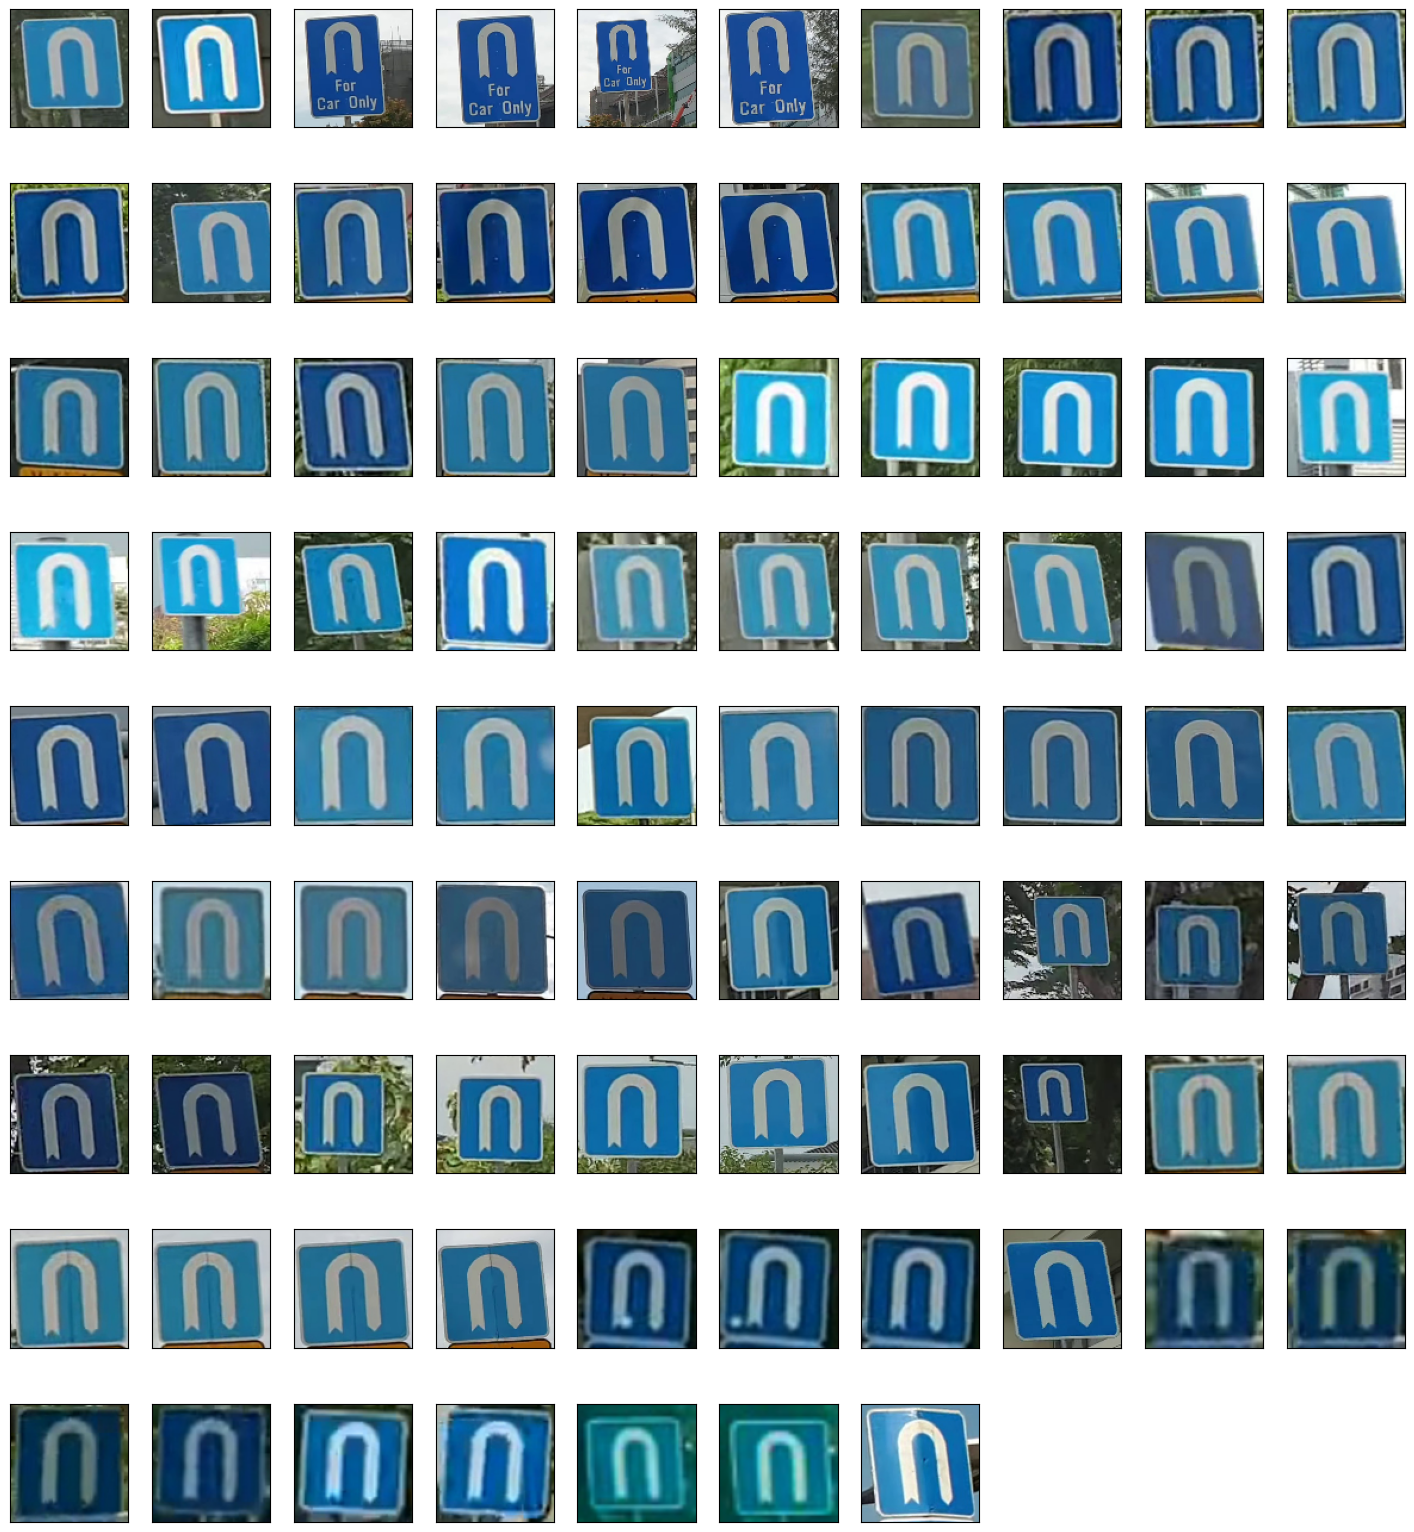

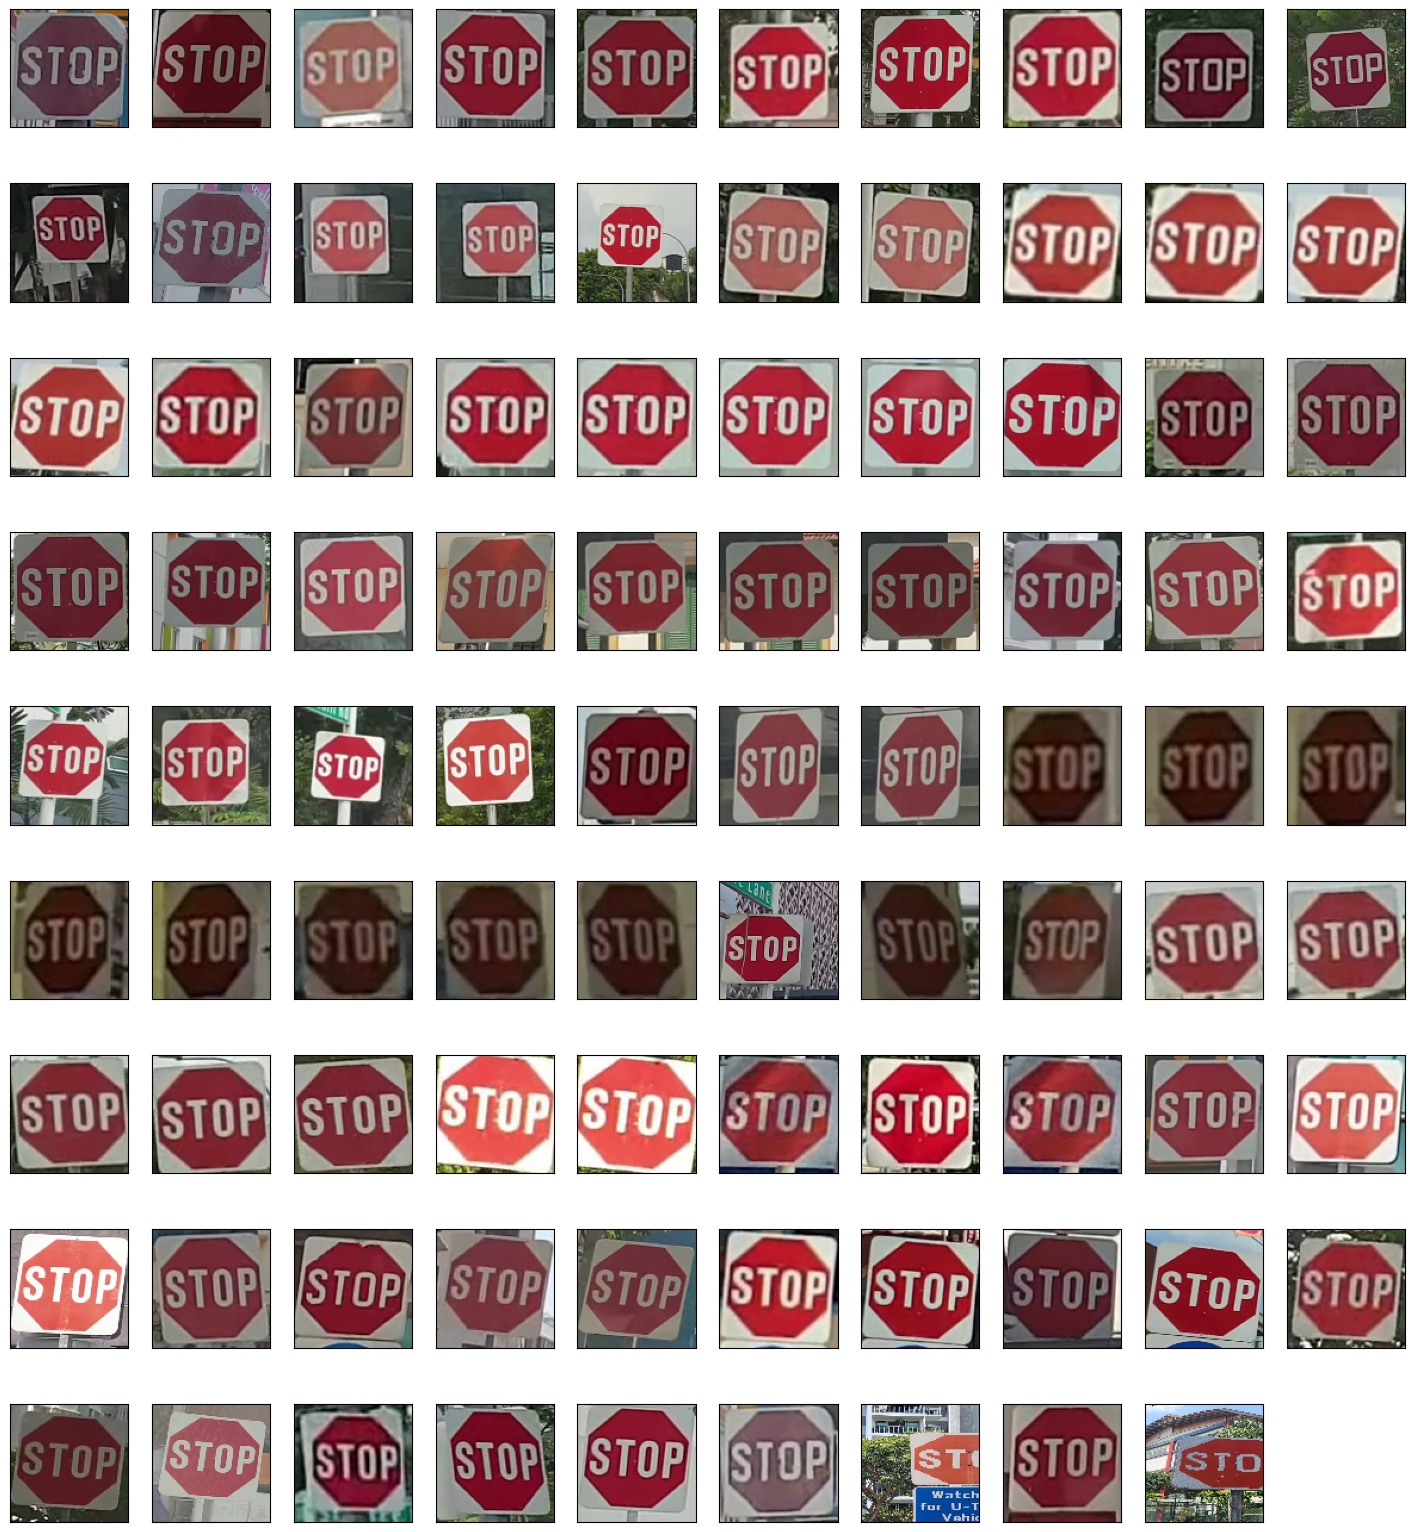

In [6]:
# Fill up this cell
num_uturn_images = 87
num_stop_images = 89
num_rows = 9
num_cols = 10

plt.figure(figsize=(18, 20))
for i in range(num_uturn_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(resize_uturn_signs[i])

plt.show()

plt.figure(figsize=(18, 20))
for i in range(num_stop_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(resize_stop_signs[i])

plt.show()






## 4.4. Target Distribution

Display a barchart of the target distribution.

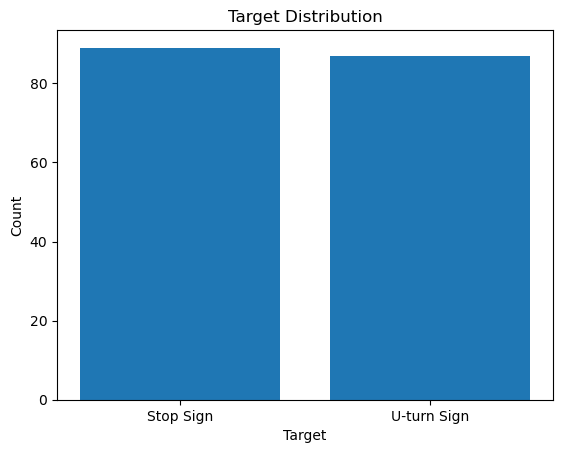

In [7]:
targets = ['Stop Sign', 'U-turn Sign']
target_counts = [len(stop_signs), len(uturn_signs)]

plt.bar(targets, target_counts)

plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Distribution')

plt.show()

# 5. Split the Data

Split the data into your train and test dataset. Set the random seed to be "42".

In [4]:
# Fill up this cell
X = np.array(resize_uturn_signs + resize_stop_signs)
y = np.array([0] * len(resize_uturn_signs) + [1] * len(resize_stop_signs))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# 6. Model Architecture

1. Create a CNN model with the following architecture requirements:
* At least two convolutional layers;
* At least one flattening process followed by a fully connected layer; and
* At least one max pooling operation.

2. Determine the appropriate:
* Loss function;
* Optimiser;
* Learning rate; and
* Metrics.

3. Determine if the training will be conducted using GPU or CPU.

4. Display the model summary.

In [5]:
# Fill up this cell
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dense (Dense)               (None, 64)                2

# 7. Create Generators for Data Augmentation

In [6]:
# Fill up this cell
generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

training_generator = generator.flow(
    X_train,
    y_train,
    batch_size = 128
)

validation_generator = generator.flow(
    X_test,
    y_test,
    batch_size = 128
)





# 8. Train the Model

Determine the appropriate number of epochs and run the model using GPU or CPU.

In [7]:
# Fill up this cell
history = model.fit(training_generator,
                    validation_data = validation_generator,
                    epochs = 10)



Epoch 1/10
2/2 [==============================] - 4s 2s/step - loss: 311.4315 - accuracy: 0.5286 - val_loss: 117.9600 - val_accuracy: 0.4722
Epoch 2/10
2/2 [==============================] - 2s 1s/step - loss: 25.0308 - accuracy: 0.5000 - val_loss: 1.5567 - val_accuracy: 0.9722
Epoch 3/10
2/2 [==============================] - 2s 1s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 1s 468ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 2s 1s/step - loss: 1.4064 - accuracy: 0.9357 - val_loss: 0.4163 - val_accuracy: 0.9444
Epoch 6/10
2/2 [==============================] - 1s 430ms/step - loss: 1.1571 - accuracy: 0.9643 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 2s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 

# 9. Save the Trained Model

In [11]:
# Fill up this cell
model.save('trained_model')

INFO:tensorflow:Assets written to: trained_model\assets


INFO:tensorflow:Assets written to: trained_model\assets


# 10. Visualise the Trained Model

## 10.1. Train vs Validation Loss

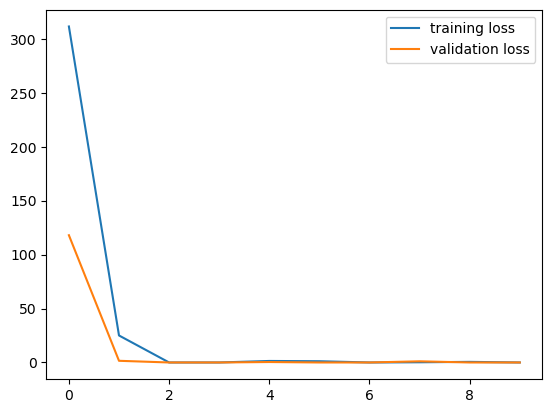

In [8]:
# Fill up this cell
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

## 10.2. Train vs Validation Accuracy

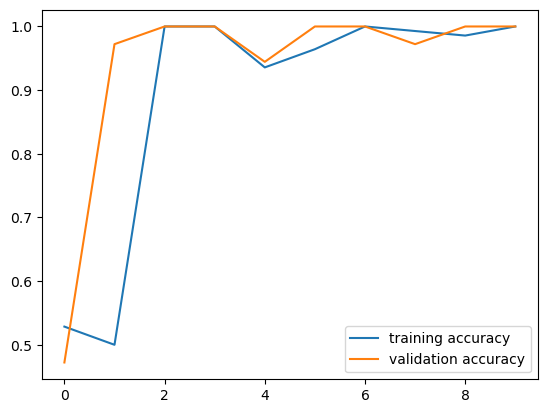

In [9]:
# Fill up this cell
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

# 11. Load the Trained Model

In [13]:
# Fill up this cell
load_model('trained_model')

# 12. Prediction

Predict the target using the test dataset.

In [23]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_test).argmax(axis=1)

2/2 [==============================] - 0s 9ms/step


# 13. Confusion Matrix

Display the confusion matrix.

In [25]:
# Fill up this cell
print(confusion_matrix(y_test, y_pred))


[[19  0]
 [ 0 17]]
